In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data

In [2]:
# Test data
n=50

# np.linspace : Return evenly spaced numbers over a specified interval.
Xtest = np.linspace(-5,5,n).reshape(-1,1)

print("Xtest shape : {}".format(Xtest.shape))

Xtest shape : (50, 1)


# Kernel function


$$
k(x_a, x_b) = \exp{ \left( -\frac{1}{2\sigma^2} \lVert x_a - x_b \rVert^2 \right)}
$$

In [0]:
# define the kernel function
def kernel(a, b, param):
    """
    Radial Basis Function kernel : https://slideplayer.com/slide/4877254/
    
    kernel function in GaussianProcess
    
    a : vector(Xtest)
    b : vector(Xtest)
    param : parametr 
    return : covariance
    """
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) -2 * np.dot(a, b.T)
    """
    np.sum(Xtest**2,1).shape : (50,1)
    np.dot(a,b.T).shape : (50,50)
    """
    return np.exp(-0.5 * (1 / param) * sqdist)

In [4]:
param = 0.1
k_xx = kernel(Xtest, Xtest, param) # K(x,x)^2

print("k_xx : {}".format(k_xx.shape))

k_xx : (50, 50)


## Cholesky decomposition

<center>
<img src='https://kr.mathworks.com/matlabcentral/mlc-downloads/downloads/fbdaa2e4-d2a3-4c67-b5fe-969a35fdc7c9/0df8c141-7053-4208-b741-6fbb33795ab1/images/screenshot.jpg' >
</center>

In [5]:
# np.linalg.cholesky : Return the Cholesky decomposition(square root)
# L : covriance matrix ** 0.5
# 1e-15*np.eye(n) : add noise
L = np.linalg.cholesky(k_xx + 1e-15 * np.eye(n)) # shape=(50,50) k(x,x)
L = np.linalg.cholesky(k_xx)
print("L : {}".format(L.shape))

L : (50, 50)


# Prior distribution

In [0]:
sample = 3
f_prior = np.random.multivariate_normal(
    mean=np.zeros(n), cov=k_xx, 
    size=sample)

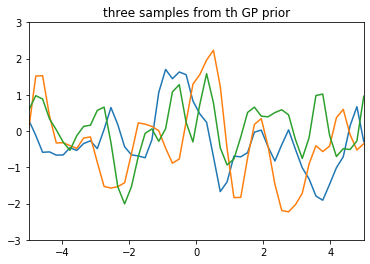

In [8]:
# visualization
for i in range(sample):
    plt.plot(Xtest,f_prior[i])
    plt.axis([-5,5,-3,3])
    plt.title("three samples from th GP prior")
plt.show()

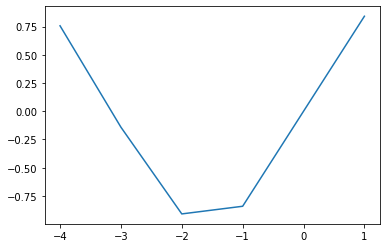

In [9]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)
plt.plot(Xtrain, ytrain)
plt.show()

In [0]:
# Apply the kernel function to our training points
K_xx = kernel(Xtest, Xtest, param) # train per train
K_yy = kernel(Xtrain, Xtrain, param) # train per train
K_xy = kernel(Xtest, Xtrain, param) # test per train
K_yx = kernel(Xtrain, Xtest, param) # train per test


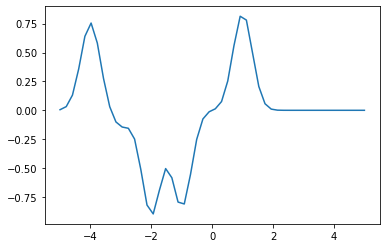

In [11]:
# posterior mean and covariance
mu = np.dot(np.dot(K_xy, np.linalg.inv(K_yy)), ytrain)
cov = K_xx - np.dot(np.dot(K_xy, np.linalg.inv(K_yy)), K_yx)

plt.plot(Xtest, mu)
plt.show()

# Covariance matrix diagonal
<center>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/595ae6dc8ee7f0708dbf854a48a8c6bfad7ff8ce' width=700>
</center>

In [0]:
s2 = np.diag(cov)
stdv = np.sqrt(s2)

In [0]:
f_post = np.random.multivariate_normal(
    mean=np.squeeze(mu, -1), cov=cov, 
    size=sample)
f_post = np.transpose(f_post, (1, 0))

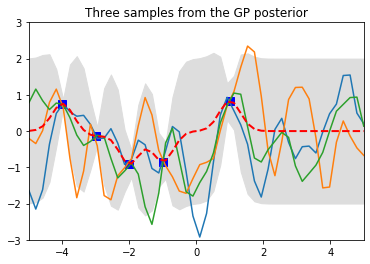

In [15]:
# # Draw samples from the posterior at our test points.
# L = np.linalg.cholesky(k_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk)) # 분산
# # posterior
# # f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3))) # shape=(50,3)

mu = np.squeeze(mu, -1)
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu - 2 * stdv, mu + 2  *stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()

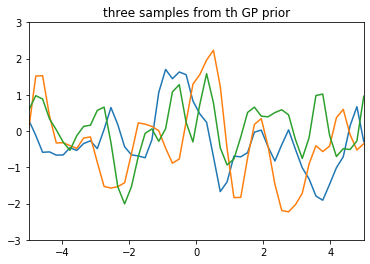

In [17]:
for i in range(sample):
    plt.plot(Xtest,f_prior[i])
    plt.axis([-5,5,-3,3])
   
    plt.title("three samples from th GP prior")
plt.show()

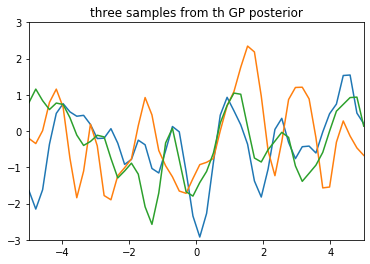

In [19]:
plt.plot(Xtest, f_post)
plt.axis([-5,5,-3,3])
plt.title("three samples from th GP posterior")
plt.show()